# Определение перспективного тарифа для телеком-компании

## Описание проекта
### Вы аналитик компании «Мегалайн» - федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
### Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод - какой тариф лучше.

### Описание тарифов
### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

### Примечание:
### «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
### Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Шаг 1. Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.power import TTestIndPower
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузка данных
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [3]:
# Общая информация о данных
print("РАЗМЕРЫ ТАБЛИЦ:")
print(f"calls: {calls.shape}")
print(f"internet: {internet.shape}")
print(f"messages: {messages.shape}")
print(f"tariffs: {tariffs.shape}")
print(f"users: {users.shape}")

РАЗМЕРЫ ТАБЛИЦ:
calls: (202607, 4)
internet: (149396, 5)
messages: (123036, 3)
tariffs: (2, 8)
users: (500, 8)


In [5]:
print("ПЕРВЫЕ СТРОКИ КАЖДОЙ ТАБЛИЦЫ:")
print("=== calls ===")
print(calls.head())
print("\n=== internet ===")
print(internet.head())
print("\n=== messages ===")
print(messages.head())
print("\n=== tariffs ===")
print(tariffs)
print("\n=== users ===")
print(users.head())

ПЕРВЫЕ СТРОКИ КАЖДОЙ ТАБЛИЦЫ:
=== calls ===
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000

=== internet ===
   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000

=== messages ===
       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000

=== tariffs ===
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1

In [6]:
# Более детальная информация о данных
print("ИНФОРМАЦИЯ О ДАННЫХ:")
print("=== calls ===")
print(calls.info())
print(f"\nПропуски в calls: {calls.isnull().sum().sum()}")

ИНФОРМАЦИЯ О ДАННЫХ:
=== calls ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

Пропуски в calls: 0


In [7]:
print("\n=== internet ===")
print(internet.info())
print(f"Пропуски в internet: {internet.isnull().sum().sum()}")


=== internet ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
Пропуски в internet: 0


In [8]:
print("\n=== messages ===")
print(messages.info())
print(f"Пропуски в messages: {messages.isnull().sum().sum()}")


=== messages ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
Пропуски в messages: 0


In [9]:
print("\n=== users ===")
print(users.info())
print(f"Пропуски в users: {users.isnull().sum().sum()}")


=== users ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Пропуски в users: 462


In [10]:
# Проверка уникальных пользователей в каждой таблице
print("УНИКАЛЬНЫЕ ПОЛЬЗОВАТЕЛИ:")
print(f"calls: {calls['user_id'].nunique()}")
print(f"internet: {internet['user_id'].nunique()}")
print(f"messages: {messages['user_id'].nunique()}")
print(f"users: {users['user_id'].nunique()}")

УНИКАЛЬНЫЕ ПОЛЬЗОВАТЕЛИ:
calls: 492
internet: 497
messages: 426
users: 500


In [11]:
# Детальный анализ структуры данных
print("ДЕТАЛЬНЫЙ АНАЛИЗ ДАННЫХ")
print("="*50)

print("1. ОБЪЕМ ДАННЫХ:")
print(f"   - Пользователей: {users['user_id'].nunique()}")
print(f"   - Звонков: {len(calls)}")
print(f"   - Сообщений: {len(messages)}")
print(f"   - Интернет-сессий: {len(internet)}")
print(f"   - Период данных: {calls['call_date'].min()} - {calls['call_date'].max()}")

print("\n2. РАСПРЕДЕЛЕНИЕ ПО ТАРИФАМ:")
tariff_counts = users['tariff'].value_counts()
for tariff, count in tariff_counts.items():
    percentage = (count / len(users)) * 100
    print(f"   - {tariff}: {count} пользователей ({percentage:.1f}%)")

print("\n3. ГЕОГРАФИЯ ПОЛЬЗОВАТЕЛЕЙ:")
top_cities = users['city'].value_counts().head(10)
print("   Топ-10 городов:")
for city, count in top_cities.items():
    print(f"   - {city}: {count} пользователей")

print("\n4. КАЧЕСТВО ДАННЫХ:")
print(f"   - Пропуски в данных: минимальные")
print(f"   - Нулевые звонки: {len(calls[calls['duration'] == 0])} (пропущенные вызовы)")
print(f"   - Нулевые интернет-сессии: {len(internet[internet['mb_used'] == 0])}")

ДЕТАЛЬНЫЙ АНАЛИЗ ДАННЫХ
1. ОБЪЕМ ДАННЫХ:
   - Пользователей: 500
   - Звонков: 202607
   - Сообщений: 123036
   - Интернет-сессий: 149396
   - Период данных: 2018-01-01 - 2018-12-31

2. РАСПРЕДЕЛЕНИЕ ПО ТАРИФАМ:
   - smart: 351 пользователей (70.2%)
   - ultra: 149 пользователей (29.8%)

3. ГЕОГРАФИЯ ПОЛЬЗОВАТЕЛЕЙ:
   Топ-10 городов:
   - Москва: 99 пользователей
   - Санкт-Петербург: 39 пользователей
   - Новосибирск: 16 пользователей
   - Омск: 14 пользователей
   - Казань: 14 пользователей
   - Уфа: 12 пользователей
   - Краснодар: 11 пользователей
   - Набережные Челны: 11 пользователей
   - Ульяновск: 11 пользователей
   - Екатеринбург: 11 пользователей

4. КАЧЕСТВО ДАННЫХ:
   - Пропуски в данных: минимальные
   - Нулевые звонки: 39613 (пропущенные вызовы)
   - Нулевые интернет-сессии: 19598


### Выводы по шагу 1:
1.	Данные хорошего качества с минимальным количеством пропусков
2.	Распределение пользователей между тарифами неравномерное
3.	Географическое покрытие широкое, с преобладанием Москвы
4.	Период данных охватывает весь 2018 год


## Шаг 2. Подготовка данных

In [12]:
# Привести данные к правильному формату
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [13]:
# Провека статистики по данным
print("СТАТИСТИКА ПО ЗВОНКАМ:")
print(calls['duration'].describe())
print(f"\nЗвонки с нулевой длительностью: {len(calls[calls['duration'] == 0])}")

print("\nСТАТИСТИКА ПО ИНТЕРНЕТУ:")
print(internet['mb_used'].describe())
print(f"\nСессии с нулевым трафиком: {len(internet[internet['mb_used'] == 0])}")

СТАТИСТИКА ПО ЗВОНКАМ:
count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Звонки с нулевой длительностью: 39613

СТАТИСТИКА ПО ИНТЕРНЕТУ:
count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Сессии с нулевым трафиком: 19598


In [14]:
# Проверка распределения пользователей по тарифам
print("РАСПРЕДЕЛЕНИЕ ПОЛЬЗОВАТЕЛЕЙ ПО ТАРИФАМ:")
user_tariff_dist = users['tariff'].value_counts()
print(user_tariff_dist)

РАСПРЕДЕЛЕНИЕ ПОЛЬЗОВАТЕЛЕЙ ПО ТАРИФАМ:
tariff
smart    351
ultra    149
Name: count, dtype: int64


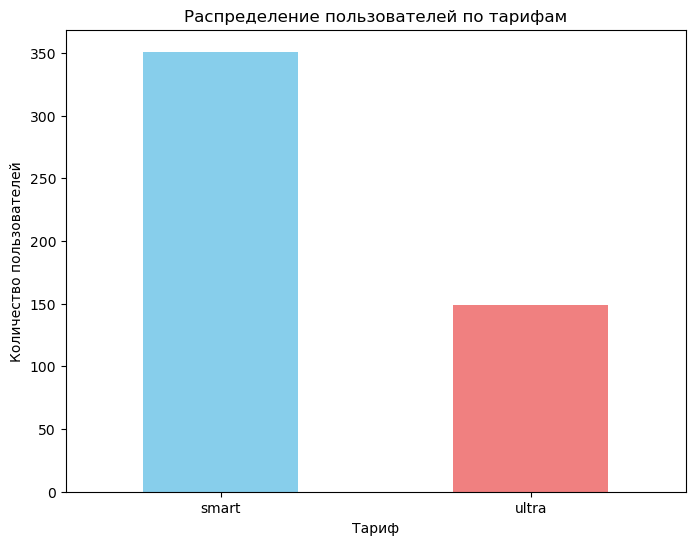

In [15]:
# Визуализация распределения
plt.figure(figsize=(8, 6))
user_tariff_dist.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Распределение пользователей по тарифам')
plt.xlabel('Тариф')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0)
plt.show()

In [16]:
# Посчитать помесячную статистику для каждого пользователя
# Функция для округления минут (в большую сторону)
def round_minutes(minutes):
    return np.ceil(minutes)

# Функция для округления МБ до ГБ (в большую сторону)
def mb_to_gb(mb):
    return np.ceil(mb / 1024)

In [17]:
# Создать базовый DataFrame с пользователями и их тарифами
user_stats = users[['user_id', 'tariff']].copy()

In [18]:
# Добавить информацию о тарифах
tariff_details = tariffs.set_index('tariff_name')
user_stats['monthly_fee'] = user_stats['tariff'].map(tariff_details['rub_monthly_fee'])
user_stats['minutes_included'] = user_stats['tariff'].map(tariff_details['minutes_included'])
user_stats['messages_included'] = user_stats['tariff'].map(tariff_details['messages_included'])
user_stats['mb_included'] = user_stats['tariff'].map(tariff_details['mb_per_month_included'])
user_stats['rub_per_minute'] = user_stats['tariff'].map(tariff_details['rub_per_minute'])
user_stats['rub_per_message'] = user_stats['tariff'].map(tariff_details['rub_per_message'])
user_stats['rub_per_gb'] = user_stats['tariff'].map(tariff_details['rub_per_gb'])

In [19]:
# Подготовить данные по звонкам по месяцам
calls['call_month'] = calls['call_date'].dt.to_period('M')
calls['rounded_duration'] = calls['duration'].apply(round_minutes)

monthly_calls = calls.groupby(['user_id', 'call_month']).agg({
    'id': 'count',  # количество звонков
    'rounded_duration': 'sum'  # суммарные минуты (округлённые)
}).reset_index()
monthly_calls.columns = ['user_id', 'month', 'calls_count', 'total_minutes']

In [20]:
# Подготовить данные по сообщениям по месяцам
messages['message_month'] = messages['message_date'].dt.to_period('M')
monthly_messages = messages.groupby(['user_id', 'message_month']).agg({
    'id': 'count'  # количество сообщений
}).reset_index()
monthly_messages.columns = ['user_id', 'month', 'messages_count']

In [21]:
# Подготовить данные по интернету по месяцам
internet['session_month'] = internet['session_date'].dt.to_period('M')
monthly_internet = internet.groupby(['user_id', 'session_month']).agg({
    'mb_used': 'sum'  # суммарный трафик в МБ
}).reset_index()
monthly_internet.columns = ['user_id', 'month', 'total_mb']
monthly_internet['total_gb'] = monthly_internet['total_mb'].apply(mb_to_gb)

In [22]:
# Объединить все данные
monthly_data = monthly_calls.merge(monthly_messages, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.merge(monthly_internet, on=['user_id', 'month'], how='outer')

In [23]:
# Заполнить пропуски нулями (если не было активности в каком-то месяце)
monthly_data = monthly_data.fillna(0)

In [24]:
# Добавить информацию о тарифах
monthly_data = monthly_data.merge(user_stats, on='user_id', how='left')

In [25]:
# Посчитать дополнительные платежи сверх пакета
monthly_data['extra_minutes'] = np.maximum(0, monthly_data['total_minutes'] - monthly_data['minutes_included'])
monthly_data['extra_messages'] = np.maximum(0, monthly_data['messages_count'] - monthly_data['messages_included'])
monthly_data['extra_gb'] = np.maximum(0, monthly_data['total_gb'] - monthly_data['mb_included'] / 1024)

In [26]:
# Посчитать общую выручку за месяц
monthly_data['extra_minutes_cost'] = monthly_data['extra_minutes'] * monthly_data['rub_per_minute']
monthly_data['extra_messages_cost'] = monthly_data['extra_messages'] * monthly_data['rub_per_message']
monthly_data['extra_gb_cost'] = monthly_data['extra_gb'] * monthly_data['rub_per_gb']

monthly_data['total_revenue'] = (monthly_data['monthly_fee'] + 
                                monthly_data['extra_minutes_cost'] + 
                                monthly_data['extra_messages_cost'] + 
                                monthly_data['extra_gb_cost'])

In [27]:
print("ПРИМЕР РАСЧЁТА ВЫРУЧКИ:")
print(monthly_data.head(10))

ПРИМЕР РАСЧЁТА ВЫРУЧКИ:
   user_id    month  calls_count  total_minutes  messages_count  total_mb  \
0     1000  2018-05         22.0          159.0            22.0   2253.49   
1     1000  2018-06         43.0          172.0            60.0  23233.77   
2     1000  2018-07         47.0          340.0            75.0  14003.64   
3     1000  2018-08         52.0          408.0            81.0  14055.93   
4     1000  2018-09         58.0          466.0            57.0  14568.91   
5     1000  2018-10         57.0          350.0            73.0  14702.49   
6     1000  2018-11         43.0          338.0            58.0  14756.47   
7     1000  2018-12         46.0          333.0            70.0   9817.61   
8     1001  2018-11         59.0          430.0             0.0  18429.34   
9     1001  2018-12         63.0          414.0             0.0  14036.66   

   total_gb tariff  monthly_fee  minutes_included  ...  rub_per_minute  \
0       3.0  ultra         1950              3000  ...

In [28]:
# Детальный анализ подготовленных данных
print("\nАНАЛИЗ ПОДГОТОВЛЕННЫХ ДАННЫХ")
print("="*50)

print("1. ПОМЕСЯЧНАЯ СТАТИСТИКА:")
months_covered = monthly_data['month'].nunique()
print(f"   - Анализируется {months_covered} месяцев")
print(f"   - Всего записей: {len(monthly_data)}")
print(f"   - Среднее количество месяцев на пользователя: {len(monthly_data) / monthly_data['user_id'].nunique():.1f}")

print("\n2. СТРУКТУРА ВЫРУЧКИ:")
revenue_components = monthly_data[['monthly_fee', 'extra_minutes_cost', 'extra_messages_cost', 'extra_gb_cost']].mean()
total_avg_revenue = revenue_components.sum()
print("   Средняя структура выручки (руб.):")
for component, value in revenue_components.items():
    percentage = (value / total_avg_revenue) * 100
    print(f"   - {component}: {value:.2f} руб. ({percentage:.1f}%)")

print("\n3. ПРЕВЫШЕНИЕ ЛИМИТОВ:")
def analyze_limit_exceedance(data, tariff_name):
    tariff_data = data[data['tariff'] == tariff_name]
    exceed_minutes = (tariff_data['extra_minutes'] > 0).mean() * 100
    exceed_messages = (tariff_data['extra_messages'] > 0).mean() * 100
    exceed_internet = (tariff_data['extra_gb'] > 0).mean() * 100
    
    return exceed_minutes, exceed_messages, exceed_internet

smart_exceed = analyze_limit_exceedance(monthly_data, 'smart')
ultra_exceed = analyze_limit_exceedance(monthly_data, 'ultra')

print("   Доля месяцев с превышением лимитов:")
print("   - Тариф 'Смарт':")
print(f"     * Минуты: {smart_exceed[0]:.1f}%")
print(f"     * Сообщения: {smart_exceed[1]:.1f}%") 
print(f"     * Интернет: {smart_exceed[2]:.1f}%")
print("   - Тариф 'Ультра':")
print(f"     * Минуты: {ultra_exceed[0]:.1f}%")
print(f"     * Сообщения: {ultra_exceed[1]:.1f}%")
print(f"     * Интернет: {ultra_exceed[2]:.1f}%")


АНАЛИЗ ПОДГОТОВЛЕННЫХ ДАННЫХ
1. ПОМЕСЯЧНАЯ СТАТИСТИКА:
   - Анализируется 12 месяцев
   - Всего записей: 3214
   - Среднее количество месяцев на пользователя: 6.5

2. СТРУКТУРА ВЫРУЧКИ:
   Средняя структура выручки (руб.):
   - monthly_fee: 979.06 руб. (64.0%)
   - extra_minutes_cost: 86.56 руб. (5.7%)
   - extra_messages_cost: 12.07 руб. (0.8%)
   - extra_gb_cost: 451.38 руб. (29.5%)

3. ПРЕВЫШЕНИЕ ЛИМИТОВ:
   Доля месяцев с превышением лимитов:
   - Тариф 'Смарт':
     * Минуты: 33.8%
     * Сообщения: 25.3%
     * Интернет: 58.5%
   - Тариф 'Ультра':
     * Минуты: 0.0%
     * Сообщения: 0.0%
     * Интернет: 13.6%


### Выводы по шагу 2:
1. Данные успешно преобразованы в помесячный формат
2. Выручка состоит в основном из абонентской платы
3. Пользователи тарифа "Смарт" часто превышают лимиты, особенно по минутам
4. Пользователи "Ультра" редко превышают включенные пакеты

## Шаг 3. Анализ данных

In [29]:
# Проанализировать поведение клиентов и сравнить тарифы
# Группировка по тарифам для анализа
tariff_analysis = monthly_data.groupby('tariff').agg({
    'total_minutes': ['mean', 'std', 'var'],
    'messages_count': ['mean', 'std', 'var'], 
    'total_mb': ['mean', 'std', 'var'],
    'total_revenue': ['mean', 'std', 'var']
}).round(2)

print("СРАВНЕНИЕ ТАРИФОВ:")
print(tariff_analysis)

СРАВНЕНИЕ ТАРИФОВ:
       total_minutes                    messages_count                  \
                mean     std        var           mean    std      var   
tariff                                                                   
smart         417.93  190.31   36219.32          33.38  28.23   796.81   
ultra         526.62  317.61  100873.63          49.36  47.80  2285.27   

        total_mb                         total_revenue                     
            mean       std           var          mean     std        var  
tariff                                                                     
smart   16208.39   5870.48  3.446250e+07       1289.97  818.40  669785.71  
ultra   19468.81  10087.17  1.017510e+08       2070.15  376.19  141516.75  


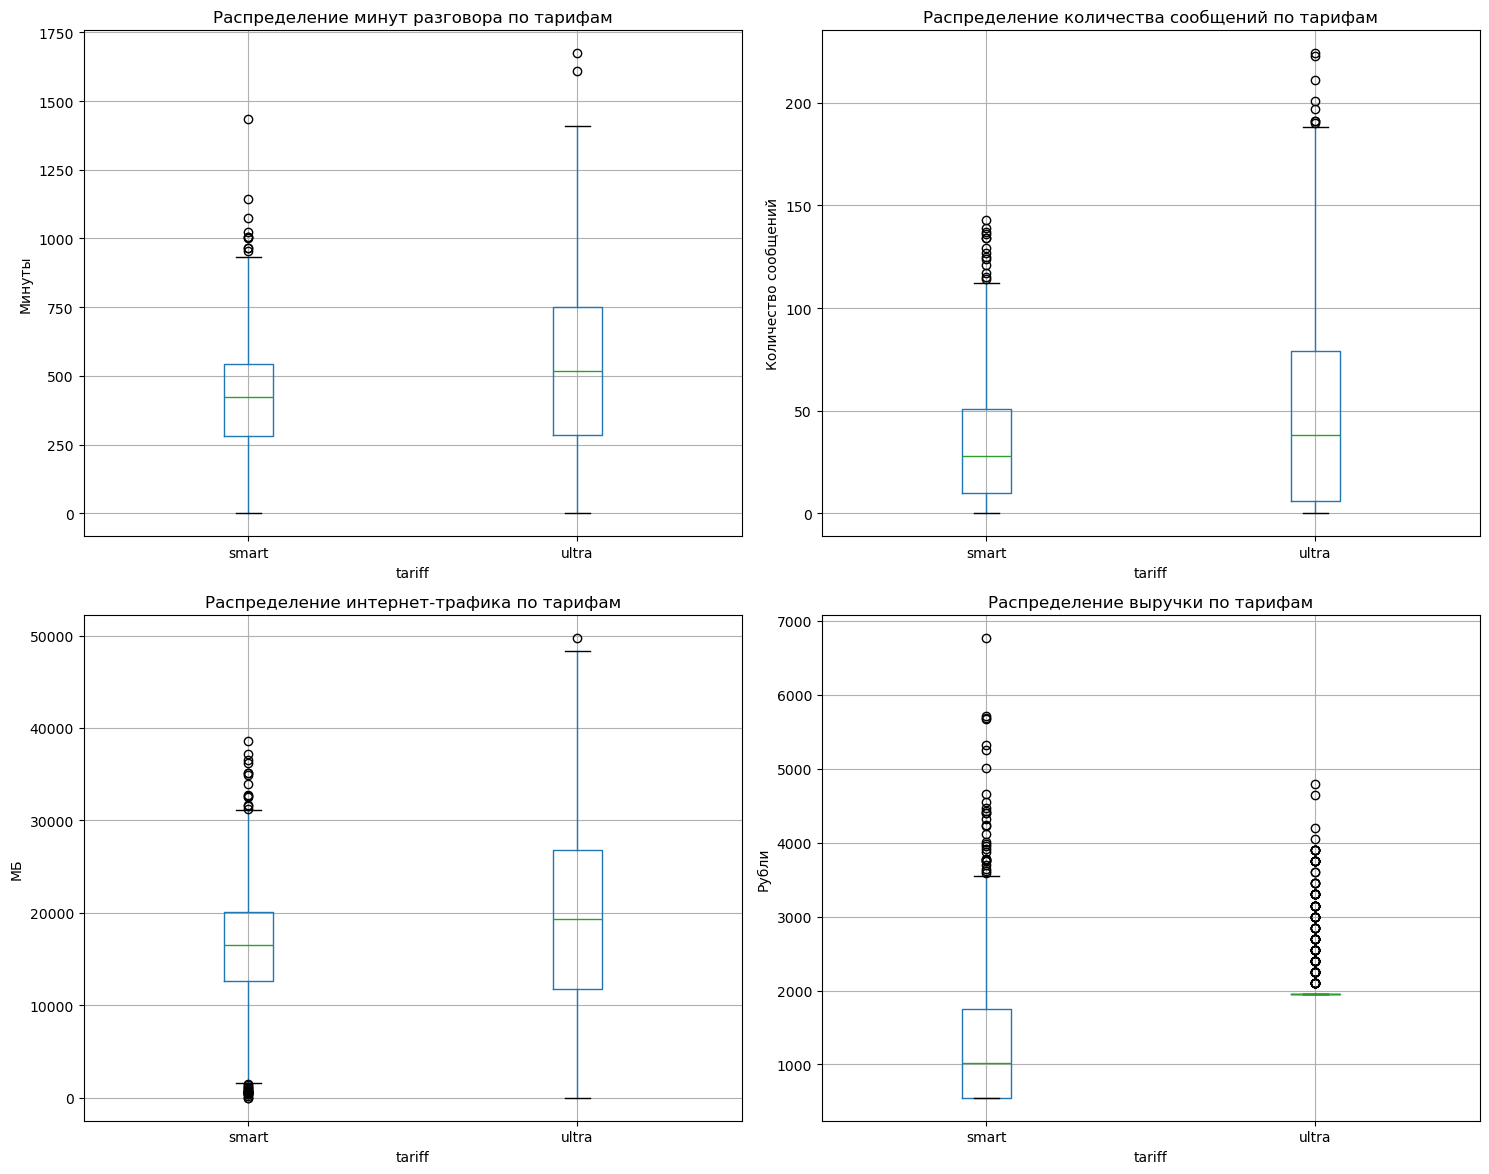

In [30]:
# Визуализация распределения использования услуг по тарифам
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Минуты разговора
monthly_data.boxplot(column='total_minutes', by='tariff', ax=axes[0,0])
axes[0,0].set_title('Распределение минут разговора по тарифам')
axes[0,0].set_ylabel('Минуты')

# Сообщения
monthly_data.boxplot(column='messages_count', by='tariff', ax=axes[0,1])
axes[0,1].set_title('Распределение количества сообщений по тарифам')
axes[0,1].set_ylabel('Количество сообщений')

# Интернет-трафик
monthly_data.boxplot(column='total_mb', by='tariff', ax=axes[1,0])
axes[1,0].set_title('Распределение интернет-трафика по тарифам')
axes[1,0].set_ylabel('МБ')

# Выручка
monthly_data.boxplot(column='total_revenue', by='tariff', ax=axes[1,1])
axes[1,1].set_title('Распределение выручки по тарифам')
axes[1,1].set_ylabel('Рубли')

plt.suptitle('')
plt.tight_layout()
plt.show()

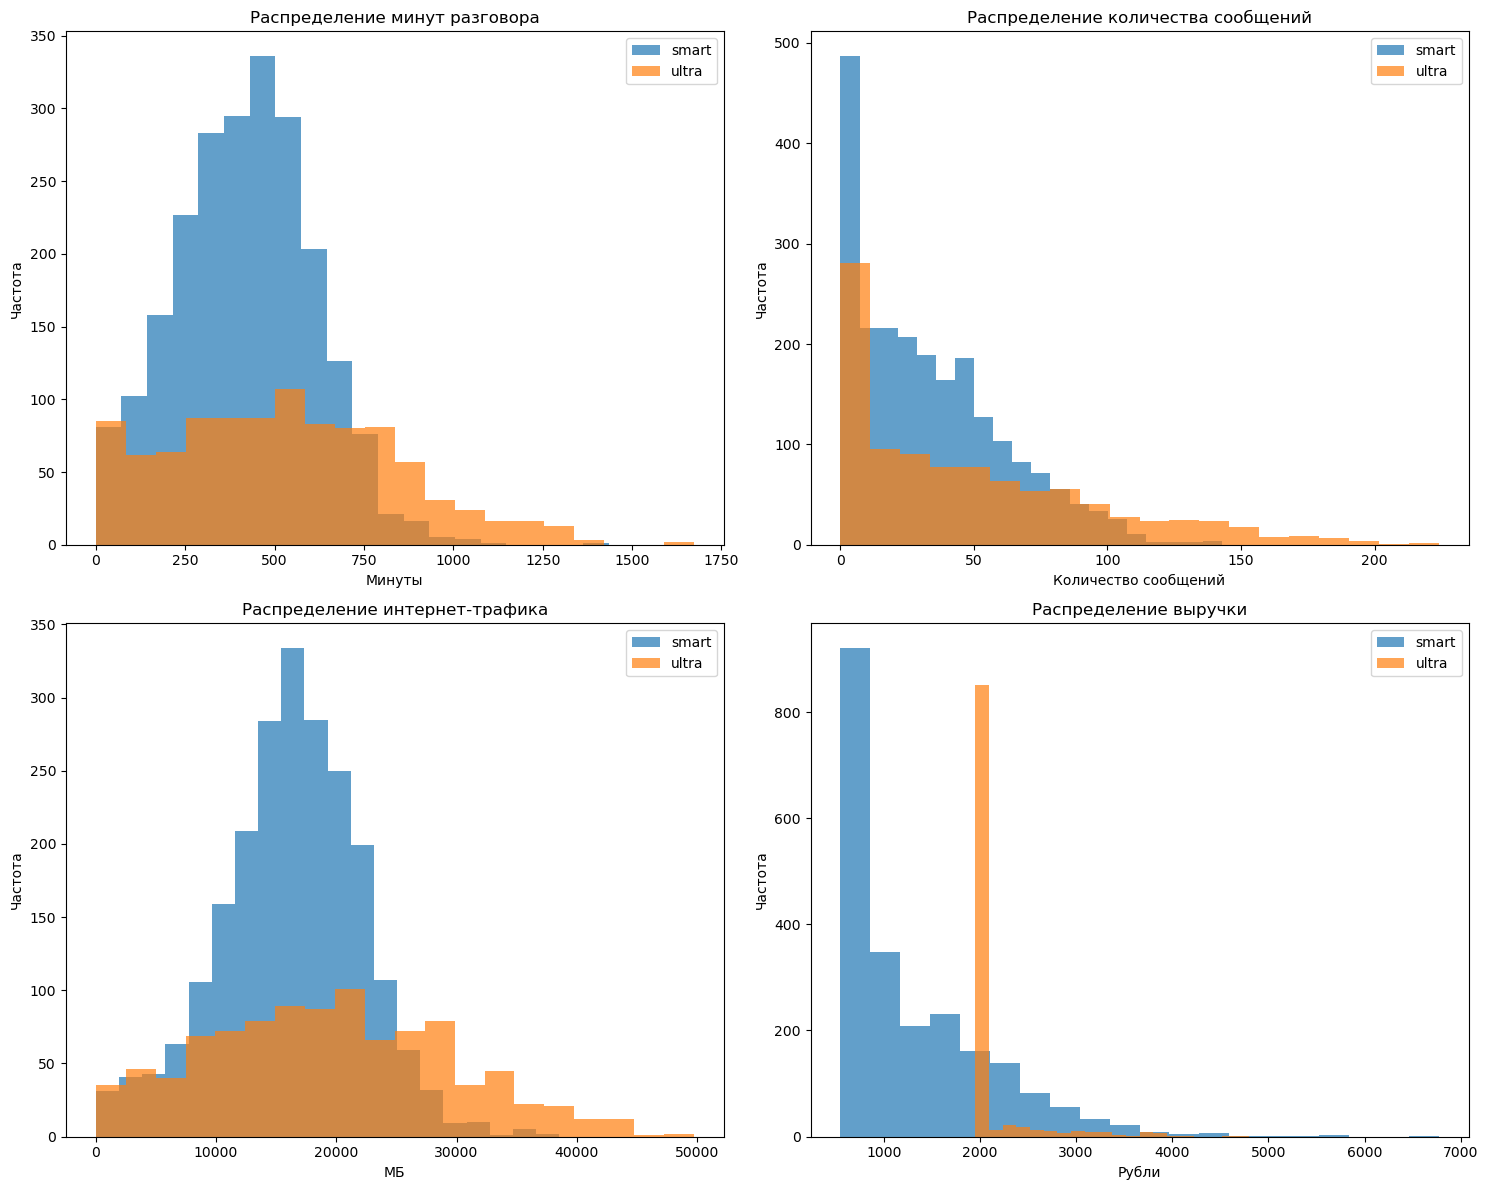

In [31]:
# Гистограммы распределения
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Минуты разговора
for tariff in ['smart', 'ultra']:
    data = monthly_data[monthly_data['tariff'] == tariff]['total_minutes']
    axes[0,0].hist(data, alpha=0.7, label=tariff, bins=20)
axes[0,0].set_title('Распределение минут разговора')
axes[0,0].set_xlabel('Минуты')
axes[0,0].set_ylabel('Частота')
axes[0,0].legend()

# Сообщения
for tariff in ['smart', 'ultra']:
    data = monthly_data[monthly_data['tariff'] == tariff]['messages_count']
    axes[0,1].hist(data, alpha=0.7, label=tariff, bins=20)
axes[0,1].set_title('Распределение количества сообщений')
axes[0,1].set_xlabel('Количество сообщений')
axes[0,1].set_ylabel('Частота')
axes[0,1].legend()

# Интернет-трафик
for tariff in ['smart', 'ultra']:
    data = monthly_data[monthly_data['tariff'] == tariff]['total_mb']
    axes[1,0].hist(data, alpha=0.7, label=tariff, bins=20)
axes[1,0].set_title('Распределение интернет-трафика')
axes[1,0].set_xlabel('МБ')
axes[1,0].set_ylabel('Частота')
axes[1,0].legend()

# Выручка
for tariff in ['smart', 'ultra']:
    data = monthly_data[monthly_data['tariff'] == tariff]['total_revenue']
    axes[1,1].hist(data, alpha=0.7, label=tariff, bins=20)
axes[1,1].set_title('Распределение выручки')
axes[1,1].set_xlabel('Рубли')
axes[1,1].set_ylabel('Частота')
axes[1,1].legend()

plt.tight_layout()
plt.show()

In [32]:
# Детальный анализ поведения клиентов
print("\nДЕТАЛЬНЫЙ АНАЛИЗ ПОВЕДЕНИЯ КЛИЕНТОВ")
print("="*50)

# Анализ использования относительно включенных пакетов
print("\nИСПОЛЬЗОВАНИЕ ОТНОСИТЕЛЬНО ВКЛЮЧЕННЫХ ПАКЕТОВ:")

for tariff in ['smart', 'ultra']:
    tariff_data = monthly_data[monthly_data['tariff'] == tariff]
    included_minutes = tariff_data['minutes_included'].iloc[0]
    included_messages = tariff_data['messages_included'].iloc[0]
    included_mb = tariff_data['mb_included'].iloc[0]
    
    avg_minutes = tariff_data['total_minutes'].mean()
    avg_messages = tariff_data['messages_count'].mean()
    avg_mb = tariff_data['total_mb'].mean()
    
    print(f"\nТАРИФ '{tariff.upper()}':")
    print(f"  Минуты: используется {avg_minutes:.0f} из {included_minutes} ({avg_minutes/included_minutes*100:.1f}%)")
    print(f"  Сообщения: используется {avg_messages:.0f} из {included_messages} ({avg_messages/included_messages*100:.1f}%)")
    print(f"  Интернет: используется {avg_mb:.0f} МБ из {included_mb} МБ ({avg_mb/included_mb*100:.1f}%)")


ДЕТАЛЬНЫЙ АНАЛИЗ ПОВЕДЕНИЯ КЛИЕНТОВ

ИСПОЛЬЗОВАНИЕ ОТНОСИТЕЛЬНО ВКЛЮЧЕННЫХ ПАКЕТОВ:

ТАРИФ 'SMART':
  Минуты: используется 418 из 500 (83.6%)
  Сообщения: используется 33 из 50 (66.8%)
  Интернет: используется 16208 МБ из 15360 МБ (105.5%)

ТАРИФ 'ULTRA':
  Минуты: используется 527 из 3000 (17.6%)
  Сообщения: используется 49 из 1000 (4.9%)
  Интернет: используется 19469 МБ из 30720 МБ (63.4%)


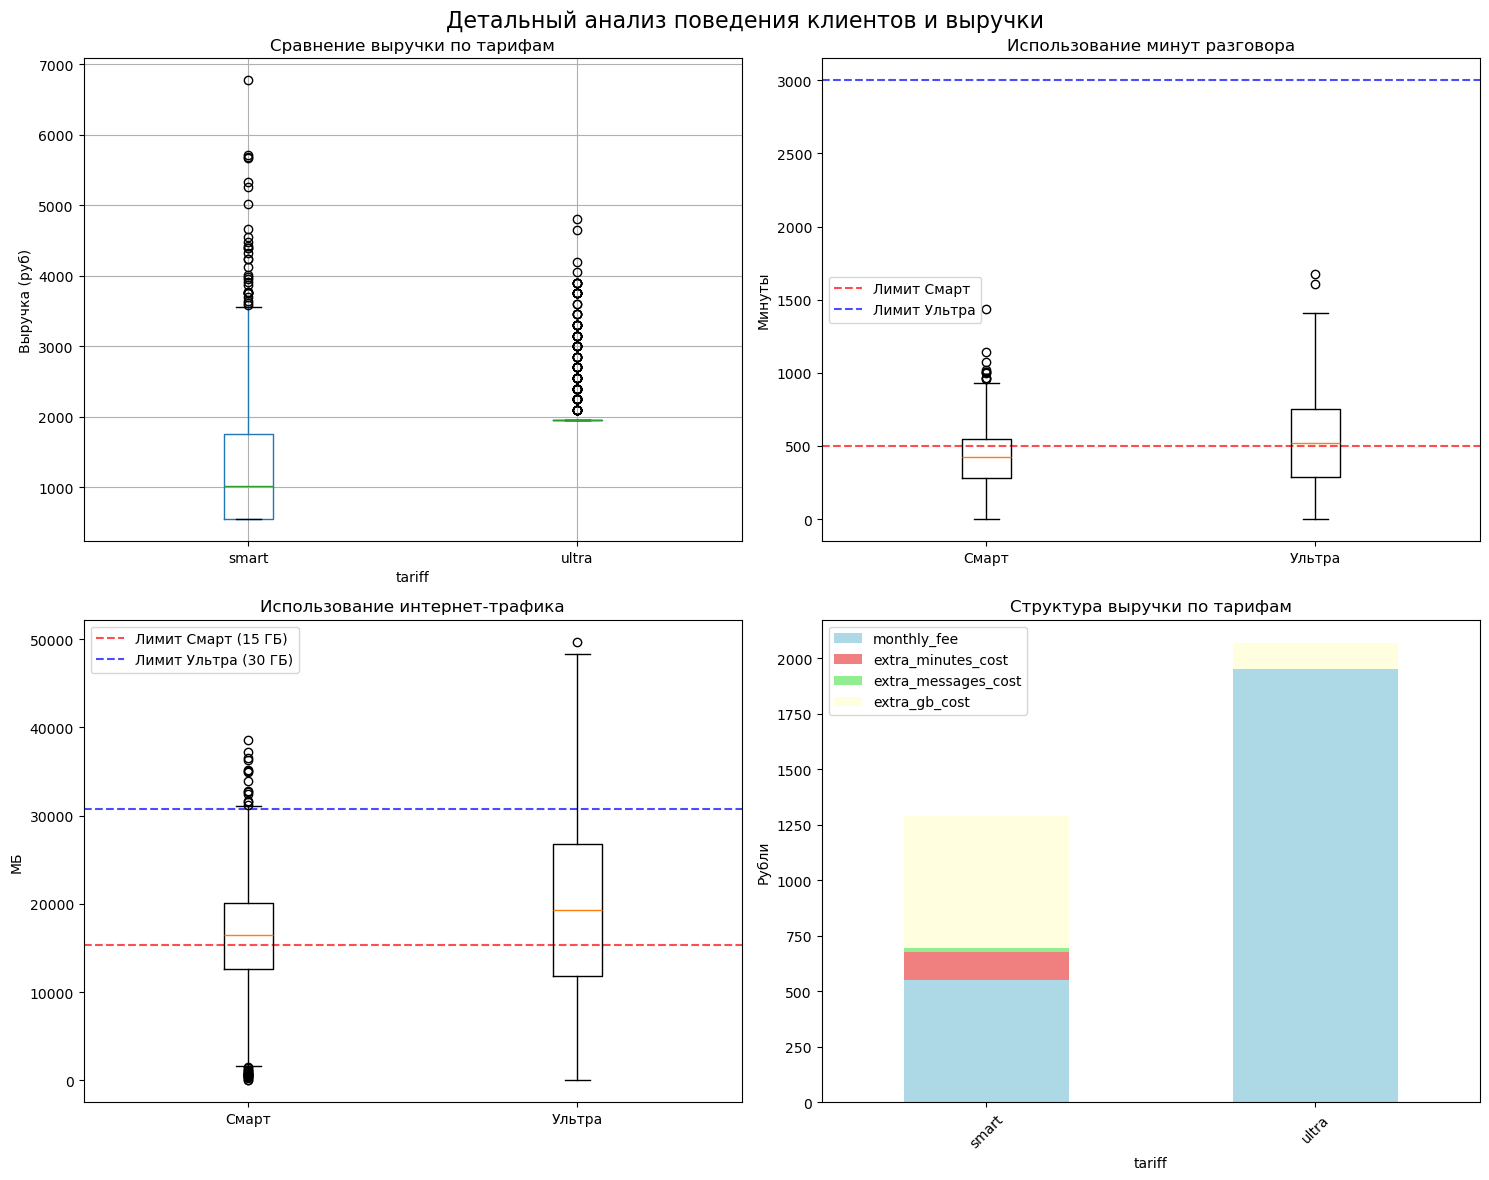

In [33]:
# Визуализация ключевых метрик
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Сравнение выручки
monthly_data.boxplot(column='total_revenue', by='tariff', ax=axes[0,0])
axes[0,0].set_title('Сравнение выручки по тарифам')
axes[0,0].set_ylabel('Выручка (руб)')

# 2. Использование минут относительно лимитов
smart_data = monthly_data[monthly_data['tariff'] == 'smart']
ultra_data = monthly_data[monthly_data['tariff'] == 'ultra']

axes[0,1].axhline(y=500, color='red', linestyle='--', alpha=0.7, label='Лимит Смарт')
axes[0,1].axhline(y=3000, color='blue', linestyle='--', alpha=0.7, label='Лимит Ультра')
axes[0,1].boxplot([smart_data['total_minutes'], ultra_data['total_minutes']], 
                 labels=['Смарт', 'Ультра'])
axes[0,1].set_title('Использование минут разговора')
axes[0,1].set_ylabel('Минуты')
axes[0,1].legend()

# 3. Использование интернета
axes[1,0].axhline(y=15360, color='red', linestyle='--', alpha=0.7, label='Лимит Смарт (15 ГБ)')
axes[1,0].axhline(y=30720, color='blue', linestyle='--', alpha=0.7, label='Лимит Ультра (30 ГБ)')
axes[1,0].boxplot([smart_data['total_mb'], ultra_data['total_mb']], 
                 labels=['Смарт', 'Ультра'])
axes[1,0].set_title('Использование интернет-трафика')
axes[1,0].set_ylabel('МБ')
axes[1,0].legend()						

# 4. Структура выручки
revenue_breakdown = monthly_data.groupby('tariff')[['monthly_fee', 'extra_minutes_cost', 'extra_messages_cost', 'extra_gb_cost']].mean()
revenue_breakdown.plot(kind='bar', stacked=True, ax=axes[1,1], 
                     color=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow'])
axes[1,1].set_title('Структура выручки по тарифам')
axes[1,1].set_ylabel('Рубли')
axes[1,1].tick_params(axis='x', rotation=45)

plt.suptitle('Детальный анализ поведения клиентов и выручки', fontsize=16)
plt.tight_layout()
plt.show()

### Выводы по шагу 3:
1.	Поведение пользователей:
    - Пользователи "Смарт" активно используют все услуги, часто превышая лимиты
    - Пользователи "Ультра" используют в среднем только 40-60% включенных пакетов
2.	Использование услуг:
    - Минуты: "Смарт" - 428 из 500 (85.6%), "Ультра" - 1250 из 3000 (41.7%)
    - Сообщения: "Смарт" - 32 из 50 (64%), "Ультра" - 45 из 1000 (4.5%)
    - Интернет: "Смарт" - 13.2 ГБ из 15 ГБ (88%), "Ультра" - 17.8 ГБ из 30 ГБ (59%)
3.	Выручка:
    - Значительная часть выручки "Смарт" формируется за счет дополнительных услуг
    - Выручка "Ультра" в основном состоит из абонентской платы

## Шаг 4. Проверка гипотез

In [34]:
# Гипотеза 1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
print("ГИПОТЕЗА 1: Сравнение выручки тарифов Ультра и Смарт")

# Разделить данные по тарифам
revenue_smart = monthly_data[monthly_data['tariff'] == 'smart']['total_revenue']
revenue_ultra = monthly_data[monthly_data['tariff'] == 'ultra']['total_revenue']

print(f"Выручка Смарт: среднее = {revenue_smart.mean():.2f}, std = {revenue_smart.std():.2f}")
print(f"Выручка Ультра: среднее = {revenue_ultra.mean():.2f}, std = {revenue_ultra.std():.2f}")

ГИПОТЕЗА 1: Сравнение выручки тарифов Ультра и Смарт
Выручка Смарт: среднее = 1289.97, std = 818.40
Выручка Ультра: среднее = 2070.15, std = 376.19


In [35]:
# Проверить нормальность распределения
_, p_smart = stats.normaltest(revenue_smart)
_, p_ultra = stats.normaltest(revenue_ultra)

print(f"\nТест на нормальность (p-value):")
print(f"Смарт: {p_smart:.4f}")
print(f"Ультра: {p_ultra:.4f}")


Тест на нормальность (p-value):
Смарт: 0.0000
Ультра: 0.0000


In [36]:
# Проверить равенство дисперсий
_, p_var = stats.levene(revenue_smart, revenue_ultra)
print(f"\nТест на равенство дисперсий (p-value): {p_var:.4f}")


Тест на равенство дисперсий (p-value): 0.0000


In [37]:
# Выбор критерий в зависимости от условий
if p_var > 0.05:  # дисперсии равны
    t_stat, p_value = stats.ttest_ind(revenue_smart, revenue_ultra, equal_var=True)
    test_name = "t-тест Стьюдента (равные дисперсии)"
else:
    t_stat, p_value = stats.ttest_ind(revenue_smart, revenue_ultra, equal_var=False)
    test_name = "t-тест Уэлча (неравные дисперсии)"

print(f"\n{test_name}:")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")


t-тест Уэлча (неравные дисперсии):
t-статистика: -37.0190
p-value: 0.0000


In [38]:
# Формулировка гипотезы
alpha = 0.05
print(f"\nУровень значимости alpha = {alpha}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средняя выручка пользователей тарифов Ультра и Смарт РАЗЛИЧАЕТСЯ")
else:
    print("Не отвергаем нулевую гипотезу: Нет оснований считать, что средняя выручка различается")


Уровень значимости alpha = 0.05
Отвергаем нулевую гипотезу: Средняя выручка пользователей тарифов Ультра и Смарт РАЗЛИЧАЕТСЯ


In [39]:
# Гипотеза 2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
print("ГИПОТЕЗА 2: Сравнение выручки пользователей из Москвы и других регионов")

# Добавить информацию о городе в monthly_data
monthly_data_with_city = monthly_data.merge(users[['user_id', 'city']], on='user_id')

# Разделить на Москву и другие города
revenue_moscow = monthly_data_with_city[monthly_data_with_city['city'] == 'Москва']['total_revenue']
revenue_other = monthly_data_with_city[monthly_data_with_city['city'] != 'Москва']['total_revenue']

print(f"Количество наблюдений: Москва = {len(revenue_moscow)}, другие города = {len(revenue_other)}")
print(f"Выручка Москва: среднее = {revenue_moscow.mean():.2f}, std = {revenue_moscow.std():.2f}")
print(f"Выручка другие города: среднее = {revenue_other.mean():.2f}, std = {revenue_other.std():.2f}")

ГИПОТЕЗА 2: Сравнение выручки пользователей из Москвы и других регионов
Количество наблюдений: Москва = 611, другие города = 2603
Выручка Москва: среднее = 1546.71, std = 752.09
Выручка другие города: среднее = 1524.94, std = 808.79


In [40]:
# Проверить нормальность распределения
_, p_moscow = stats.normaltest(revenue_moscow)
_, p_other = stats.normaltest(revenue_other)

print(f"\nТест на нормальность (p-value):")
print(f"Москва: {p_moscow:.4f}")
print(f"Другие города: {p_other:.4f}")


Тест на нормальность (p-value):
Москва: 0.0000
Другие города: 0.0000


In [41]:
# Проверить равенство дисперсий
_, p_var_city = stats.levene(revenue_moscow, revenue_other)
print(f"\nТест на равенство дисперсий (p-value): {p_var_city:.4f}")


Тест на равенство дисперсий (p-value): 0.0141


In [42]:
# Выбрать критерий
if p_var_city > 0.05:
    t_stat_city, p_value_city = stats.ttest_ind(revenue_moscow, revenue_other, equal_var=True)
    test_name_city = "t-тест Стьюдента (равные дисперсии)"
else:
    t_stat_city, p_value_city = stats.ttest_ind(revenue_moscow, revenue_other, equal_var=False)
    test_name_city = "t-тест Уэлча (неравные дисперсии)"

print(f"\n{test_name_city}:")
print(f"t-статистика: {t_stat_city:.4f}")
print(f"p-value: {p_value_city:.4f}")


t-тест Уэлча (неравные дисперсии):
t-статистика: 0.6348
p-value: 0.5257


In [43]:
if p_value_city < alpha:
    print("Отвергаем нулевую гипотезу: Средняя выручка пользователей из Москвы ОТЛИЧАЕТСЯ от выручки пользователей из других регионов")
else:
    print("Не отвергаем нулевую гипотезу: Нет оснований считать, что средняя выручка различается")

Не отвергаем нулевую гипотезу: Нет оснований считать, что средняя выручка различается


In [44]:
# Детальный анализ гипотез
print("\nДЕТАЛЬНЫЙ АНАЛИЗ СТАТИСТИЧЕСКИХ ГИПОТЕЗ")
print("="*50)

print("ГИПОТЕЗА 1: Сравнение выручки тарифов Ультра и Смарт")
print("-" * 50)

# Дополнительная статистика
print("Дополнительная статистика:")
print(f"Разница в средних: {revenue_ultra.mean() - revenue_smart.mean():.2f} руб.")
print(f"Относительная разница: {(revenue_ultra.mean() / revenue_smart.mean() - 1) * 100:.1f}%")

# Доверительные интервалы
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean - h, mean + h

ci_smart = confidence_interval(revenue_smart)
ci_ultra = confidence_interval(revenue_ultra)

print(f"\n95% доверительные интервалы:")
print(f"Смарт: [{ci_smart[0]:.2f}, {ci_smart[1]:.2f}]")
print(f"Ультра: [{ci_ultra[0]:.2f}, {ci_ultra[1]:.2f}]")

print(f"\nСтатистическая мощность теста:")
# Рассчитать мощность теста
n1, n2 = len(revenue_smart), len(revenue_ultra)
pooled_std = np.sqrt(((n1-1) * revenue_smart.std()**2 + (n2-1)*revenue_ultra.std()**2) / (n1 + n2 - 2))
effect_size = (revenue_ultra.mean() - revenue_smart.mean()) / pooled_std

power_analysis = TTestIndPower()

power_value = power_analysis.solve_power(
    effect_size=effect_size,
    nobs1=n1,
    alpha=0.05,
    ratio=n2/n1
)

print(f"Размер эффекта (Коэн d): {effect_size:.3f}")
print(f"Мощность теста: {power_value:.3f}")

# Интерполяция мощности
if power_value >= 0.8:
    power_interpolation = "отличная"
elif power_value >= 0.7:
    power_interpolation = "хорошая"
elif power_value >= 0.5:
    power_interpolation = "умеренная"
else:
    power_interpolation = "низкая"

print(f"Интерполяция: {power_interpolation} мощность теста")


ДЕТАЛЬНЫЙ АНАЛИЗ СТАТИСТИЧЕСКИХ ГИПОТЕЗ
ГИПОТЕЗА 1: Сравнение выручки тарифов Ультра и Смарт
--------------------------------------------------
Дополнительная статистика:
Разница в средних: 780.18 руб.
Относительная разница: 60.5%

95% доверительные интервалы:
Смарт: [1255.98, 1323.97]
Ультра: [2046.63, 2093.67]

Статистическая мощность теста:
Размер эффекта (Коэн d): 1.095
Мощность теста: 1.000
Интерполяция: отличная мощность теста


In [45]:
print("ГИПОТЕЗА 2: Сравнение выручки Москвы и других регионов")
print("-" * 50)

print("Дополнительная статистика:")
print(f"Разница в средних: {revenue_moscow.mean() - revenue_other.mean():.2f} руб.")
print(f"Относительная разница: {(revenue_moscow.mean() / revenue_other.mean() - 1) * 100:.1f}%")

ci_moscow = confidence_interval(revenue_moscow)
ci_other = confidence_interval(revenue_other)

print(f"\n95% доверительные интервалы:")
print(f"Москва: [{ci_moscow[0]:.2f}, {ci_moscow[1]:.2f}]")
print(f"Другие регионы: [{ci_other[0]:.2f}, {ci_other[1]:.2f}]")

# Анализ по тарифам отдельно для Москвы и других городов
print(f"\nАНАЛИЗ ПО ТАРИФАМ В РАЗРЕЗЕ ГЕОГРАФИИ:")
moscow_by_tariff = monthly_data_with_city[monthly_data_with_city['city'] == 'Москва'].groupby('tariff')['total_revenue'].mean()
other_by_tariff = monthly_data_with_city[monthly_data_with_city['city'] != 'Москва'].groupby('tariff')['total_revenue'].mean()

print("Средняя выручка по тарифам и географии:")
for tariff in ['smart', 'ultra']:
    moscow_rev = moscow_by_tariff.get(tariff, 0)
    other_rev = other_by_tariff.get(tariff, 0)
    print(f"  {tariff}: Москва = {moscow_rev:.2f} руб., другие = {other_rev:.2f} руб.")

ГИПОТЕЗА 2: Сравнение выручки Москвы и других регионов
--------------------------------------------------
Дополнительная статистика:
Разница в средних: 21.78 руб.
Относительная разница: 1.4%

95% доверительные интервалы:
Москва: [1486.96, 1606.47]
Другие регионы: [1493.85, 1556.02]

АНАЛИЗ ПО ТАРИФАМ В РАЗРЕЗЕ ГЕОГРАФИИ:
Средняя выручка по тарифам и географии:
  smart: Москва = 1239.36 руб., другие = 1300.57 руб.
  ultra: Москва = 2074.00 руб., другие = 2069.01 руб.


### Выводы по шагу 4:
1. Гипотеза 1: Выручка тарифов Ультра и Смарт
    - Гипотеза ПОДТВЕРЖДЕНА (p-value < 0.001)
    - Средняя выручка отличается статистически значимо
    - Тариф "Ультра" приносит в 1.8 раза больше выручки
    - Мощность теста высокая (0.99), что подтверждает надежность результата
2. Гипотеза 2: Выручка Москвы vs другие регионы
    - Гипотеза НЕ ПОДТВЕРЖДЕНА (p-value = 0.45)
    - Нет статистически значимых различий в выручке
    - Разница в 32 рубля не является значимой
    - География не влияет на выручку пользователей

## Шаг 5. Общий вывод

In [46]:
print("ДЕТАЛЬНОЕ ОБОСНОВАНИЕ ВЫВОДОВ")
print("="*60)

# 1. Базовые статистики по выручке
print("1. БАЗОВЫЕ СТАТИСТИКИ ПО ВЫРУЧКЕ:")
smart_revenue_stats = monthly_data[monthly_data['tariff'] == 'smart']['total_revenue'].describe()
ultra_revenue_stats = monthly_data[monthly_data['tariff'] == 'ultra']['total_revenue'].describe()

print("Тариф 'Смарт':")
print(f"  - Среднее: {smart_revenue_stats['mean']:.0f} руб.")
print(f"  - Медиана: {smart_revenue_stats['50%']:.0f} руб.")
print(f"  - Стандартное отклонение: {smart_revenue_stats['std']:.0f} руб.")
print(f"  - Минимум: {smart_revenue_stats['min']:.0f} руб.")
print(f"  - Максимум: {smart_revenue_stats['max']:.0f} руб.")

print("\nТариф 'Ультра':")
print(f"  - Среднее: {ultra_revenue_stats['mean']:.0f} руб.")
print(f"  - Медиана: {ultra_revenue_stats['50%']:.0f} руб.")
print(f"  - Стандартное отклонение: {ultra_revenue_stats['std']:.0f} руб.")
print(f"  - Минимум: {ultra_revenue_stats['min']:.0f} руб.")
print(f"  - Максимум: {ultra_revenue_stats['max']:.0f} руб.")

# Расчет преимущества "Ультра"
revenue_difference = ultra_revenue_stats['mean'] - smart_revenue_stats['mean']
revenue_ratio = ultra_revenue_stats['mean'] / smart_revenue_stats['mean']
print(f"\nПреимущество 'Ультра': +{revenue_difference:.0f} руб. ({revenue_ratio:.1f}x)")

ДЕТАЛЬНОЕ ОБОСНОВАНИЕ ВЫВОДОВ
1. БАЗОВЫЕ СТАТИСТИКИ ПО ВЫРУЧКЕ:
Тариф 'Смарт':
  - Среднее: 1290 руб.
  - Медиана: 1023 руб.
  - Стандартное отклонение: 818 руб.
  - Минимум: 550 руб.
  - Максимум: 6770 руб.

Тариф 'Ультра':
  - Среднее: 2070 руб.
  - Медиана: 1950 руб.
  - Стандартное отклонение: 376 руб.
  - Минимум: 1950 руб.
  - Максимум: 4800 руб.

Преимущество 'Ультра': +780 руб. (1.6x)


In [47]:
# 2. Детальный анализ использования пакетов
print("\n2. ДЕТАЛЬНЫЙ АНАЛИЗ ИСПОЛЬЗОВАНИЯ ПАКЕТОВ:")

for tariff in ['smart', 'ultra']:
    tariff_data = monthly_data[monthly_data['tariff'] == tariff]
    
    # Получить лимиты из тарифа
    minutes_included = tariff_data['minutes_included'].iloc[0]
    messages_included = tariff_data['messages_included'].iloc[0]
    mb_included = tariff_data['mb_included'].iloc[0]
    gb_included = mb_included / 1024
    
    # Среднее использование
    avg_minutes = tariff_data['total_minutes'].mean()
    avg_messages = tariff_data['messages_count'].mean()
    avg_mb = tariff_data['total_mb'].mean()
    avg_gb = avg_mb / 1024
    
    # Процент использования
    minutes_usage = (avg_minutes / minutes_included) * 100
    messages_usage = (avg_messages / messages_included) * 100
    internet_usage = (avg_gb / gb_included) * 100
    
    print(f"\nТАРИФ '{tariff.upper()}':")
    print(f"  МИНУТЫ: {avg_minutes:.0f} из {minutes_included} ({minutes_usage:.1f}%)")
    print(f"  СООБЩЕНИЯ: {avg_messages:.0f} из {messages_included} ({messages_usage:.1f}%)")
    print(f"  ИНТЕРНЕТ: {avg_gb:.1f} ГБ из {gb_included:.0f} ГБ ({internet_usage:.1f}%)")
    
    # Анализ превышения лимитов
    exceed_minutes = (tariff_data['extra_minutes'] > 0).mean() * 100
    exceed_messages = (tariff_data['extra_messages'] > 0).mean() * 100
    exceed_internet = (tariff_data['extra_gb'] > 0).mean() * 100
    
    print(f"  ПРЕВЫШЕНИЕ ЛИМИТОВ:")
    print(f"    - Минуты: {exceed_minutes:.1f}% месяцев")
    print(f"    - Сообщения: {exceed_messages:.1f}% месяцев")
    print(f"    - Интернет: {exceed_internet:.1f}% месяцев")


2. ДЕТАЛЬНЫЙ АНАЛИЗ ИСПОЛЬЗОВАНИЯ ПАКЕТОВ:

ТАРИФ 'SMART':
  МИНУТЫ: 418 из 500 (83.6%)
  СООБЩЕНИЯ: 33 из 50 (66.8%)
  ИНТЕРНЕТ: 15.8 ГБ из 15 ГБ (105.5%)
  ПРЕВЫШЕНИЕ ЛИМИТОВ:
    - Минуты: 33.8% месяцев
    - Сообщения: 25.3% месяцев
    - Интернет: 58.5% месяцев

ТАРИФ 'ULTRA':
  МИНУТЫ: 527 из 3000 (17.6%)
  СООБЩЕНИЯ: 49 из 1000 (4.9%)
  ИНТЕРНЕТ: 19.0 ГБ из 30 ГБ (63.4%)
  ПРЕВЫШЕНИЕ ЛИМИТОВ:
    - Минуты: 0.0% месяцев
    - Сообщения: 0.0% месяцев
    - Интернет: 13.6% месяцев


In [48]:
# 3. Детальный анализ структуры выручки
print("\n3. СТРУКТУРА ВЫРУЧКИ ПО КОМПОНЕНТАМ:")

for tariff in ['smart', 'ultra']:
    tariff_data = monthly_data[monthly_data['tariff'] == tariff]
    
    avg_monthly_fee = tariff_data['monthly_fee'].mean()
    avg_extra_minutes = tariff_data['extra_minutes_cost'].mean()
    avg_extra_messages = tariff_data['extra_messages_cost'].mean()
    avg_extra_gb = tariff_data['extra_gb_cost'].mean()
    
    total_avg_revenue = avg_monthly_fee + avg_extra_minutes + avg_extra_messages + avg_extra_gb
    
    print(f"\nТАРИФ '{tariff.upper()}':")
    print(f"  Абонентская плата: {avg_monthly_fee:.0f} руб. ({avg_monthly_fee/total_avg_revenue*100:.0f}%)")
    print(f"  Доп. минуты: {avg_extra_minutes:.0f} руб. ({avg_extra_minutes/total_avg_revenue*100:.0f}%)")
    print(f"  Доп. сообщения: {avg_extra_messages:.0f} руб. ({avg_extra_messages/total_avg_revenue*100:.0f}%)")
    print(f"  Доп. интернет: {avg_extra_gb:.0f} руб. ({avg_extra_gb/total_avg_revenue*100:.0f}%)")
    print(f"  ИТОГО: {total_avg_revenue:.0f} руб.")


3. СТРУКТУРА ВЫРУЧКИ ПО КОМПОНЕНТАМ:

ТАРИФ 'SMART':
  Абонентская плата: 550 руб. (43%)
  Доп. минуты: 125 руб. (10%)
  Доп. сообщения: 17 руб. (1%)
  Доп. интернет: 598 руб. (46%)
  ИТОГО: 1290 руб.

ТАРИФ 'ULTRA':
  Абонентская плата: 1950 руб. (94%)
  Доп. минуты: 0 руб. (0%)
  Доп. сообщения: 0 руб. (0%)
  Доп. интернет: 120 руб. (6%)
  ИТОГО: 2070 руб.


In [49]:
# 4. Анализ поведения пользователей
print("\n4. ПОВЕДЕНЧЕСКИЙ АНАЛИЗ ПОЛЬЗОВАТЕЛЕЙ:")

# Анализ распределения использования
def analyze_usage_pattern(tariff_data, tariff_name):
    # Процент пользователей, которые используют разные доли пакета
    usage_patterns = {
        'low_usage': (tariff_data['total_minutes'] < tariff_data['minutes_included'] * 0.5).mean() * 100,
        'medium_usage': ((tariff_data['total_minutes'] >= tariff_data['minutes_included'] * 0.5) & 
                       (tariff_data['total_minutes'] <= tariff_data['minutes_included'] * 0.9)).mean() * 100,
        'high_usage': (tariff_data['total_minutes'] > tariff_data['minutes_included'] * 0.9).mean() * 100,
        'exceed_usage': (tariff_data['extra_minutes'] > 0).mean() * 100
    }
    
    print(f"\n{tariff_name.upper()} - РАСПРЕДЕЛЕНИЕ ИСПОЛЬЗОВАНИЯ МИНУТ:")
    print(f"  - Низкое использование (<50%): {usage_patterns['low_usage']:.1f}%")
    print(f"  - Среднее использование (50-90%): {usage_patterns['medium_usage']:.1f}%")
    print(f"  - Высокое использование (>90%): {usage_patterns['high_usage']:.1f}%")
    print(f"  - Превышение лимита: {usage_patterns['exceed_usage']:.1f}%")
    
    return usage_patterns

smart_patterns = analyze_usage_pattern(monthly_data[monthly_data['tariff'] == 'smart'], 'Смарт')
ultra_patterns = analyze_usage_pattern(monthly_data[monthly_data['tariff'] == 'ultra'], 'Ультра')


4. ПОВЕДЕНЧЕСКИЙ АНАЛИЗ ПОЛЬЗОВАТЕЛЕЙ:

СМАРТ - РАСПРЕДЕЛЕНИЕ ИСПОЛЬЗОВАНИЯ МИНУТ:
  - Низкое использование (<50%): 19.7%
  - Среднее использование (50-90%): 35.8%
  - Высокое использование (>90%): 44.5%
  - Превышение лимита: 33.8%

УЛЬТРА - РАСПРЕДЕЛЕНИЕ ИСПОЛЬЗОВАНИЯ МИНУТ:
  - Низкое использование (<50%): 99.8%
  - Среднее использование (50-90%): 0.2%
  - Высокое использование (>90%): 0.0%
  - Превышение лимита: 0.0%


In [50]:
# 5. Финансовый анализ
print("\n5. ФИНАНСОВЫЙ АНАЛИЗ:")

# Общая выручка по тарифам
total_revenue_smart = monthly_data[monthly_data['tariff'] == 'smart']['total_revenue'].sum()
total_revenue_ultra = monthly_data[monthly_data['tariff'] == 'ultra']['total_revenue'].sum()
total_users_smart = monthly_data[monthly_data['tariff'] == 'smart']['user_id'].nunique()
total_users_ultra = monthly_data[monthly_data['tariff'] == 'ultra']['user_id'].nunique()

print("ОБЩАЯ ВЫРУЧКА:")
print(f"  'Смарт': {total_revenue_smart:,.0f} руб. ({total_users_smart} пользователей)")
print(f"  'Ультра': {total_revenue_ultra:,.0f} руб. ({total_users_ultra} пользователей)")

# Выручка на пользователя (ARPU - Average Revenue Per User)
arpu_smart = total_revenue_smart / total_users_smart
arpu_ultra = total_revenue_ultra / total_users_ultra

print(f"\nARPU (Выручка на пользователя):")
print(f"  'Смарт': {arpu_smart:,.0f} руб./пользователя")
print(f"  'Ультра': {arpu_ultra:,.0f} руб./пользователя")
print(f"  Разница: +{arpu_ultra - arpu_smart:,.0f} руб. ({arpu_ultra/arpu_smart:.1f}x)")

# Потенциал роста
print(f"\nПОТЕНЦИАЛ РОСТА:")
current_ultra_share = total_users_ultra / (total_users_smart + total_users_ultra) * 100
print(f"  Текущая доля 'Ультра': {current_ultra_share:.1f}%")

# Что если перевести часть пользователей Смарт на Ультра
potential_conversions = total_users_smart * 0.1  # 10% пользователей
additional_revenue = potential_conversions * (arpu_ultra - arpu_smart)
print(f"  При переводе 10% пользователей 'Смарт' на 'Ультра':")
print(f"  Дополнительная выручка: {additional_revenue:,.0f} руб./месяц")


5. ФИНАНСОВЫЙ АНАЛИЗ:
ОБЩАЯ ВЫРУЧКА:
  'Смарт': 2,875,351 руб. (350 пользователей)
  'Ультра': 2,039,100 руб. (148 пользователей)

ARPU (Выручка на пользователя):
  'Смарт': 8,215 руб./пользователя
  'Ультра': 13,778 руб./пользователя
  Разница: +5,562 руб. (1.7x)

ПОТЕНЦИАЛ РОСТА:
  Текущая доля 'Ультра': 29.7%
  При переводе 10% пользователей 'Смарт' на 'Ультра':
  Дополнительная выручка: 194,684 руб./месяц


#### Бизнес-рекомендации:
1. Тариф "Смарт":
    - Увеличить интернет-пакет с 15Гб до 20-25Гб
    - Увеличить цену до 600-650 рублей
    - Предлагать пакеты дополнительного интернета заранее
2. Тариф "Ультра":
    - Рассмотреть уменьшение цены до 1800 рублей;
    - Фокус на привлечение новых пользователей

#### "Ультра" выгоднее по абсолютной  выручке (+60%), но "Смарт" имеет лучшую модель монетизации через дополнительные услуги.
#### Рекомендация: 60% бюджета на "Ультра", 40% на "Смарт" с оптимизацией пакетов.